**Load pretrained model**

In [3]:
import torch
from IMGNet import MyNet

def loadMynet(device='cpu', model_path='./IMGNet.pth'):
    mynet = MyNet()
    mynet.to(device=device)
    state_dict = torch.load(model_path, map_location=device, )
    mynet.load_state_dict(state_dict)
    return mynet

net = loadMynet()

**Read imgs and display**

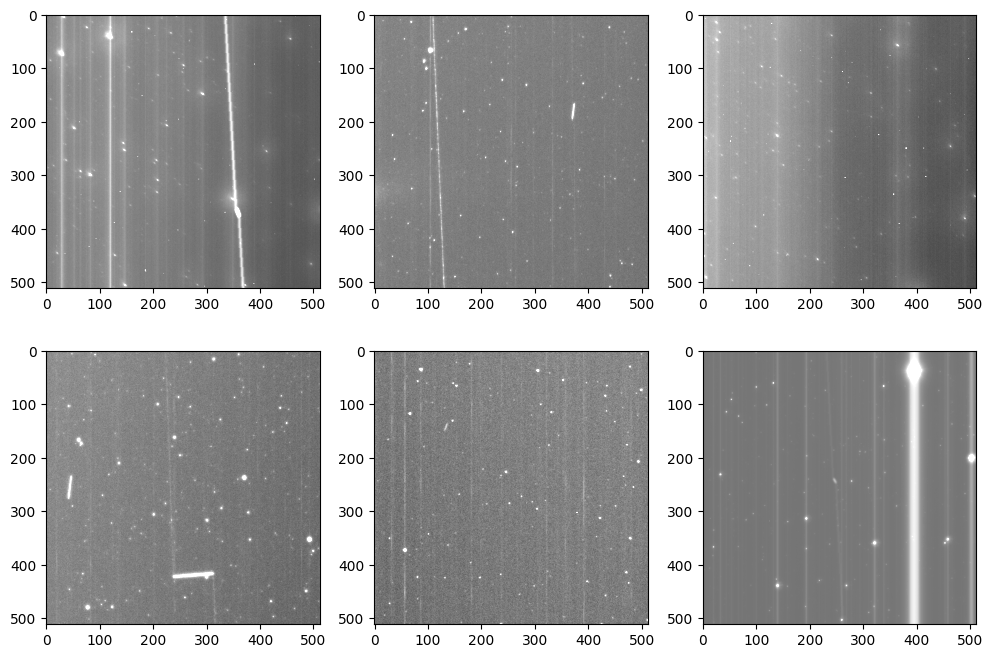

In [14]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

test_dir = './test_imgs'
imgs = [cv2.imread(os.path.join(test_dir, x), cv2.IMREAD_UNCHANGED).astype(np.float32) \
        for x in os.listdir(test_dir) if x.endswith('.tif')]

fig, axes = plt.subplots(2,3,figsize=(12,8))
for i in range(2):
    for j in range(3):
        ax = axes[i, j]
        img = imgs[i*3+j]
        u, v = img.mean(), img.std()
        vmax, vmin = u+4*v, u-4*v
        ax.imshow(img, vmax=vmax, vmin=vmin, cmap='gray')

**Desmear with IMGNet**

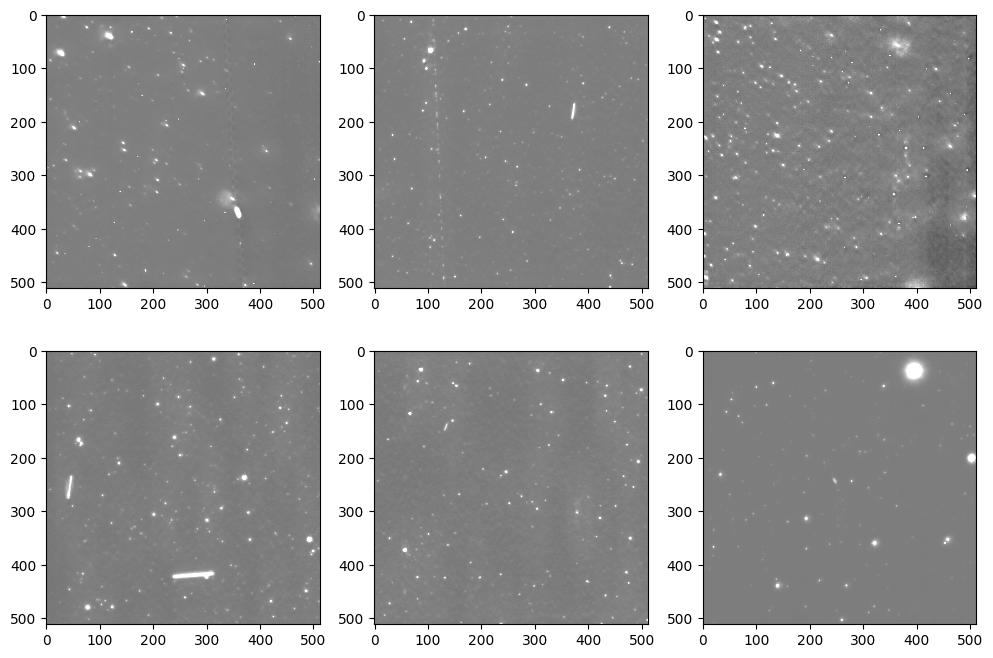

In [13]:
def predict_img(net, img, device='cpu'):
    net.eval()
    if img.ndim == 2:
        img = img[np.newaxis, ...]
    else:
        img = img.transpose((2, 0, 1))
    if (img > 1).any():
        img = (img - img.min()) / (img.max() - img.min())
    img = torch.from_numpy(img)
    img = img.unsqueeze(0)
    img = img.to(device=device, dtype=torch.float32)
    with torch.no_grad():
        output = net(img).cpu()
    return output[0].to(torch.float32).squeeze().numpy()


des = [predict_img(net, img) for img in imgs]
fig, axes = plt.subplots(2,3,figsize=(12,8))
for i in range(2):
    for j in range(3):
        ax = axes[i, j]
        de = des[i*3+j]
        u, v = de.mean(), de.std()
        vmax, vmin = u+4*v, u-4*v
        ax.imshow(de, vmax=vmax, vmin=vmin, cmap='gray')